# Workshop: Spatial sensing, 3D sensor data representation and modelling

Course: NICF- Spatial Reasoning from Sensor Data (SF)

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/spatial-reasoning-from-sensor-data/artificial-intelligence

Contact: Dr. Tian Jing

Email: tianjing@nus.edu.sg

## Objective
In this workshop, we will perform following two tasks.
- Perform disparity estimation from stereo images
- Perform feature extraction and matching from multi-view images

## Installation guideline

- Open `Anaconda Prompt`

- Append the channel `conda-forge` into your conda configuration.

`conda config --append channels conda-forge`

- Create a new virtual environment `srsdv` or install additional packages in your own environment

**[Windows, CPU version]**

`conda create -n srsdv python=3.6 numpy=1.15.1 opencv=3.4.2 matplotlib=2.2.3 tensorflow=1.10.0 scipy=1.1.0 scikit-learn=0.19.1 spyder=3.3.2 yaml=0.1.7 keras=2.2.4 pillow=5.4.1 notebook=5.7.4`

**[Windows, GPU version, CUDA 9.0]**

`conda create -n srsdv python=3.6 numpy=1.15.1 opencv=3.4.2 matplotlib=2.2.3 tensorflow-gpu=1.12.0 scipy=1.1.0 scikit-learn=0.19.1 spyder=3.3.2 yaml=0.1.7 keras-gpu=2.2.4 pillow=5.4.1 notebook=5.7.4`

- Activate the environment `srsdv`

`conda activate srsdv`

- Browse to the folder that contains the workshop files, then run `Jupyter Notebook`

`jupyter notebook`


## Submission guideline
Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.


In [1]:
# Load necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


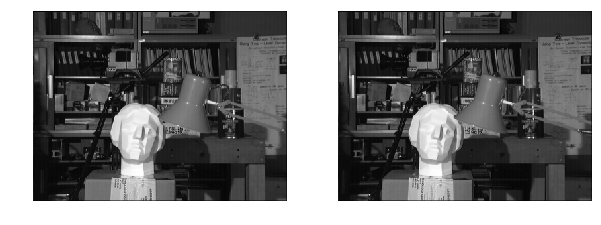

In [2]:
# Load the left and right images in gray scale
# Middlebury Stereo Vision Dataset, http://vision.middlebury.edu/stereo/data/scenes2001/
imgLeft = cv2.imread('data/tsukuba1.png', 0)
imgRight = cv2.imread('data/tsukuba2.png', 0)

# Display two input images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgLeft, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(imgRight, 'gray')
plt.axis('off')
plt.show()


# Exercise 1: Disparity estimation from stereo image

- Reference: https://docs.opencv.org/3.4/d9/dba/classcv_1_1StereoBM.html

- Parameters
    - `numDisparities`: The disparity search range. For each pixel algorithm will find the best disparity from 0 (default minimum disparity) to numDisparities. The search range can then be shifted by changing the minimum disparity.
    - `blockSize`: The linear size of the blocks compared by the algorithm. The size should be odd (as the block is centered at the current pixel). Larger block size implies smoother, though less accurate disparity map. Smaller block size gives more detailed disparity map, but there is higher chance for algorithm to find a wrong correspondence.

In [3]:
# Calculate and show disparity

def ShowDisparity(bSize=5):
    # Initialize the stereo block matching object 
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=bSize)

    # Compute the disparity image
    disparity = stereo.compute(imgLeft, imgRight)

    # Normalize the image for representation
    min = disparity.min()
    max = disparity.max()
    disparity = np.uint8(255 * (disparity - min) / (max - min))
    
    #Plot the result
    return disparity


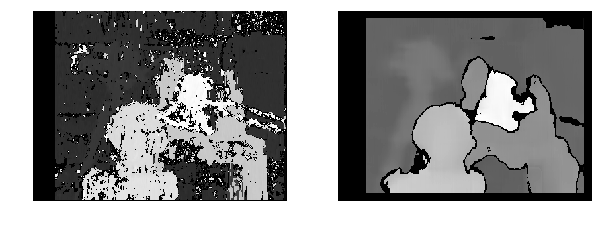

In [4]:
# Perform depth estimation and compare the performance using different block size bSize
# Note: the window size `bSize` should be odd number

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
result = ShowDisparity(bSize=5)
plt.imshow(result, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
result = ShowDisparity(bSize=25)
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()


# Exercise 2: Feature extraction and matching


$\color{red}{\text{Q1. Complete following code to perform ORB feature extraction and matching}}$

Tasks
- Choose two images based on your interest, or download two images from https://github.com/openMVG/SfM_quality_evaluation
- Apply the `ORB` feature extraction and matching method on these two images, see tutorial in https://docs.opencv.org/trunk/dc/dc3/tutorial_py_matcher.html
- Illustrate the matched points of these two images

Reference
- ORB in OpenCV, https://docs.opencv.org/3.4.2/d1/d89/tutorial_py_orb.html


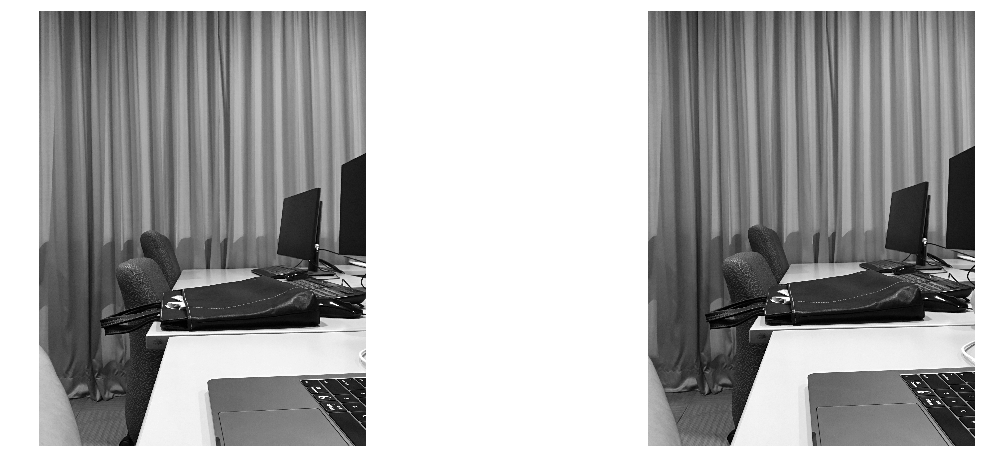

image1: 100 points detected
image2: 100 points detected


In [22]:
# Step 1: Load two images as gray images
image1 = cv2.imread('data/IMG_6206.jpg', 0)
image2 = cv2.imread('data/IMG_6207.jpg', 0)

# Display traning two images
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(image1,'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image2,'gray')
plt.axis('off')
plt.show()

# Step 2: Define feature extraction method, and perform detection and extraction
# Use SIFT method
sift = cv2.xfeatures2d.SIFT_create(100)

image1_keypoints, image1_descriptor = sift.detectAndCompute(image1, None)
image2_keypoints, image2_descriptor = sift.detectAndCompute(image2, None)

print('image1: %d points detected' % len(image1_keypoints))
print('image2: %d points detected' % len(image2_keypoints))

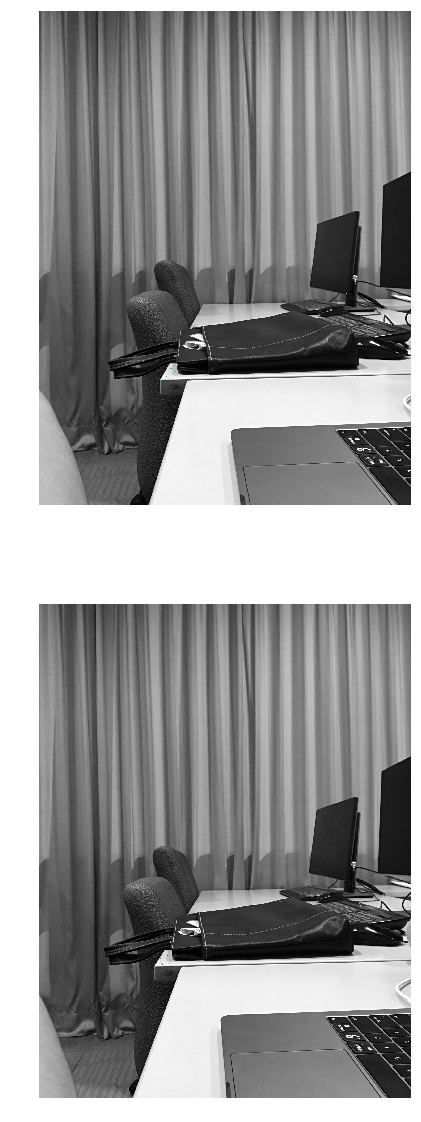

In [23]:


# Illustrate detected point and scale overlayed on the image

image1_bk = np.copy(image1)
image2_bk = np.copy(image2)

image1_bk = cv2.drawKeypoints(image1, image1_keypoints, image1_bk, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_bk = cv2.drawKeypoints(image2, image2_keypoints, image2_bk, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.imshow(image1_bk)
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(image2_bk)
plt.axis('off')
plt.show()

Number of good matchings: 59 with threshold 0.75


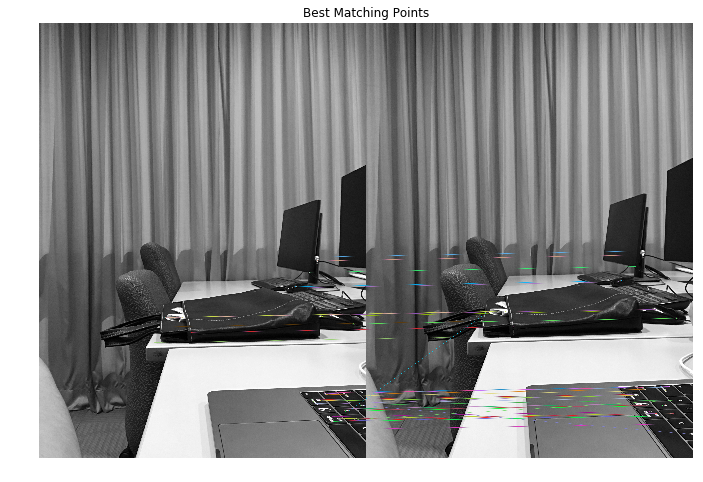

In [29]:




# Step3: Create a matcher and perform feature matching
bf = cv2.BFMatcher()
# Return k=2 best matches for each descriptor from a query set
matches = bf.knnMatch(image1_descriptor, image2_descriptor, k=2)


# Apply ratio test
# Be careful at the good_matches and drawing, 
# see https://stackoverflow.com/questions/48063525/error-with-matches1to2-with-opencv-sift
good_matches = []
thre_ratio = 0.75
for m, n in matches:
    #print("{} - {}".format(m.distance ,n.distance))
    if m.distance < thre_ratio*n.distance:
        good_matches.append(m)
        
# Print total number of matching points between the training and query images
print("Number of good matchings: %d with threshold %.2f" % (len(good_matches), thre_ratio))

result = cv2.drawMatches(image1, image1_keypoints, image2, image2_keypoints, good_matches, image2, flags = 2)

# Step4: Display the best matching points
plt.figure(figsize=(20,8))
plt.title('Best Matching Points')
plt.imshow(result)
plt.axis('off')
plt.show()

In [6]:

# Step 1: Load two images as gray images

# Step 2: Define ORB feature extraction method, and perform detection and extraction
# see https://docs.opencv.org/trunk/dc/dc3/tutorial_py_matcher.html


# Step3: Create a matcher and perform feature matching

# Step4: Display the best matching points


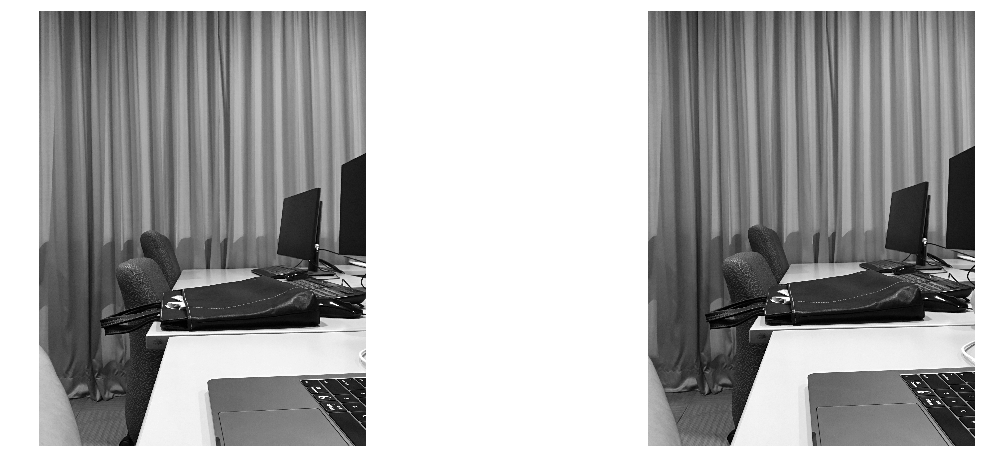

image1: 500 points detected
image2: 500 points detected


In [31]:
# Step 1: Load two images as gray images
image1 = cv2.imread('data/IMG_6206.jpg', 0)
image2 = cv2.imread('data/IMG_6207.jpg', 0)

# Display traning two images
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(image1,'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image2,'gray')
plt.axis('off')
plt.show()

# Step 2: Define feature extraction method, and perform detection and extraction
# Use SIFT method
orb = cv2.ORB_create()

image1_keypoints, image1_descriptor = orb.detectAndCompute(image1, None)
image2_keypoints, image2_descriptor = orb.detectAndCompute(image2, None)

print('image1: %d points detected' % len(image1_keypoints))
print('image2: %d points detected' % len(image2_keypoints))

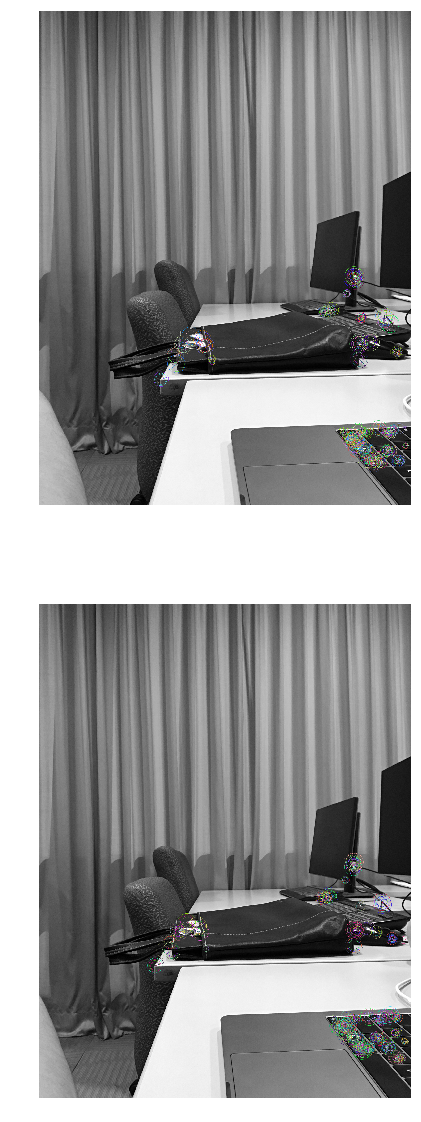

In [32]:


# Illustrate detected point and scale overlayed on the image

image1_bk = np.copy(image1)
image2_bk = np.copy(image2)

image1_bk = cv2.drawKeypoints(image1, image1_keypoints, image1_bk, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_bk = cv2.drawKeypoints(image2, image2_keypoints, image2_bk, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.imshow(image1_bk)
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(image2_bk)
plt.axis('off')
plt.show()

Number of good matchings: 106 with threshold 0.75
[[[ 68  68  68]
  [ 64  64  64]
  [ 61  61  61]
  ...
  [ 81  81  81]
  [ 77  77  77]
  [ 74  74  74]]

 [[ 69  69  69]
  [ 68  68  68]
  [ 66  66  66]
  ...
  [ 83  83  83]
  [ 79  79  79]
  [ 77  77  77]]

 [[ 69  69  69]
  [ 70  70  70]
  [ 71  71  71]
  ...
  [ 85  85  85]
  [ 82  82  82]
  [ 81  81  81]]

 ...

 [[191 191 191]
  [190 190 190]
  [188 188 188]
  ...
  [ 43  43  43]
  [ 40  40  40]
  [ 38  38  38]]

 [[189 189 189]
  [188 188 188]
  [185 185 185]
  ...
  [ 41  41  41]
  [ 40  40  40]
  [ 38  38  38]]

 [[188 188 188]
  [186 186 186]
  [183 183 183]
  ...
  [ 40  40  40]
  [ 39  39  39]
  [ 38  38  38]]]


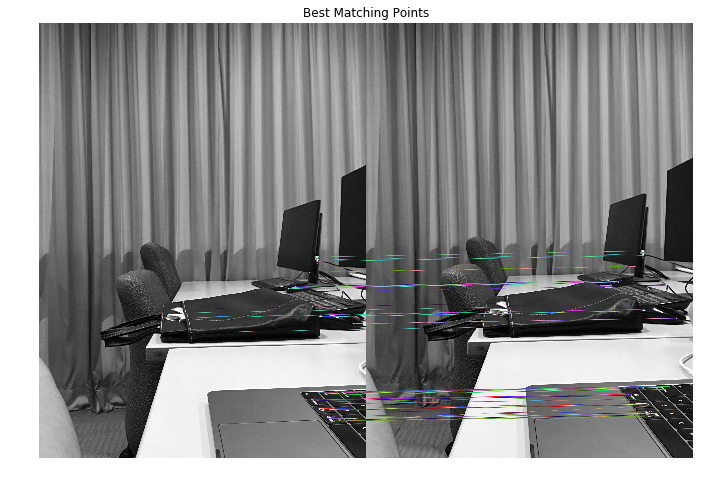

In [35]:




# Step3: Create a matcher and perform feature matching
bf = cv2.BFMatcher()
# Return k=2 best matches for each descriptor from a query set
matches = bf.knnMatch(image1_descriptor, image2_descriptor, k=2)


# Apply ratio test
# Be careful at the good_matches and drawing, 
# see https://stackoverflow.com/questions/48063525/error-with-matches1to2-with-opencv-sift
good_matches = []
thre_ratio = 0.75
for m, n in matches:
    #print("{} - {}".format(m.distance ,n.distance))
    if m.distance < thre_ratio*n.distance:
        good_matches.append(m)
        
# Print total number of matching points between the training and query images
print("Number of good matchings: %d with threshold %.2f" % (len(good_matches), thre_ratio))

result = cv2.drawMatches(image1, image1_keypoints, image2, image2_keypoints, good_matches, image2, flags = 2)

print(result)

# Step4: Display the best matching points
plt.figure(figsize=(20,8))
plt.title('Best Matching Points')
plt.imshow(result)
plt.axis('off')
plt.show()

**Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day.